In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('user_behavior_dataset_cleaned.csv')
df.head()

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class,App_Usage_Time_outlier,Screen_On_Time_outlier,Battery_Drain_outlier,Data_Usage_outlier
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,False,False,False,False
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,False,False,False,False
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,False,False,False,False
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,False,False,False,False
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,False


In [4]:
df = df[['App_Usage_Time', 'Battery_Drain', 'Number_of_Apps_Installed',
         'Data_Usage', 'User_Behavior_Class', 'Screen_On_Time']]
X = df.drop(columns=['Screen_On_Time'])
y = df['Screen_On_Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Ridge Regression:
MSE: 0.6118485534139653
R2 Score: 0.9318079059966161


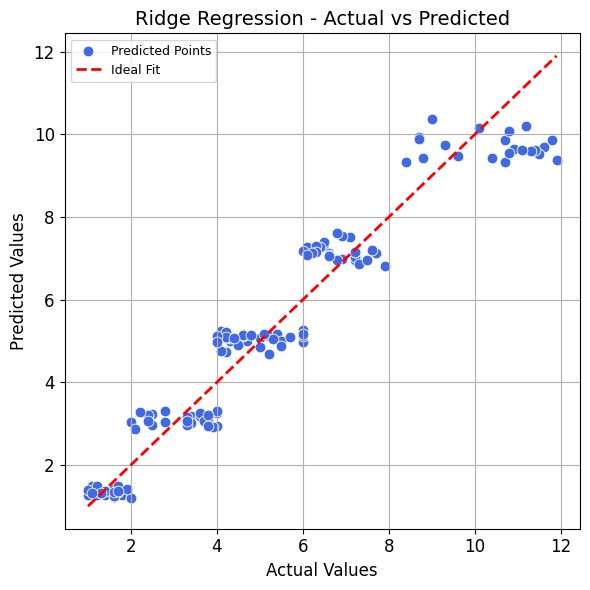

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='w', s=60, label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit')
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Ridge Regression - Actual vs Predicted', fontsize=14)
plt.tight_layout()
plt.show()